In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
stock_data = pd.read_csv('../../datasets/b3_dados/processed/acoes_concat.csv')

1. **Gráficos de Linhas: Evolução Temporal** \
\
Objetivo: Mostrar como os preços de uma ou mais ações variam ao longo do tempo.

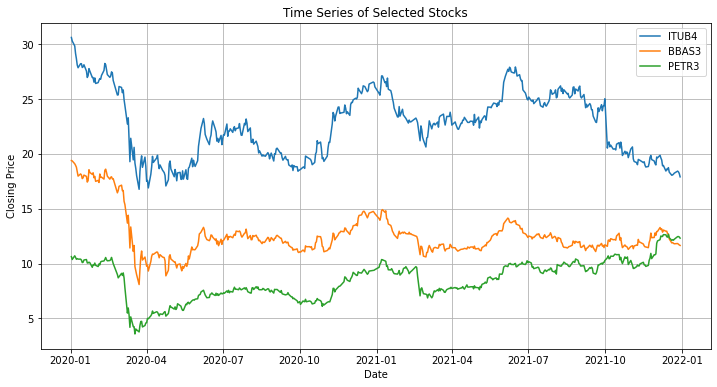

In [13]:

def plot_time_series(data, stocks, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    filtered_data = data.copy()
    filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    for stock in stocks:
        plt.plot(filtered_data['Date'], filtered_data[stock], label=stock)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Time Series of Selected Stocks')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplos
plot_time_series(stock_data, ['ITUB4', 'BBAS3', 'PETR3'], start_date='2020-01-01', end_date='2022-01-01')



2. **Bandas de Bollinger (Bollinger Bands)**\
 Bandas de Bollinger consistem em uma média móvel (SMA) e duas bandas (superior e inferior) que representam o desvio padrão do preço.\
Elas ajudam a identificar a volatilidade do mercado e possíveis pontos de reversão (quando o preço toca as bandas).

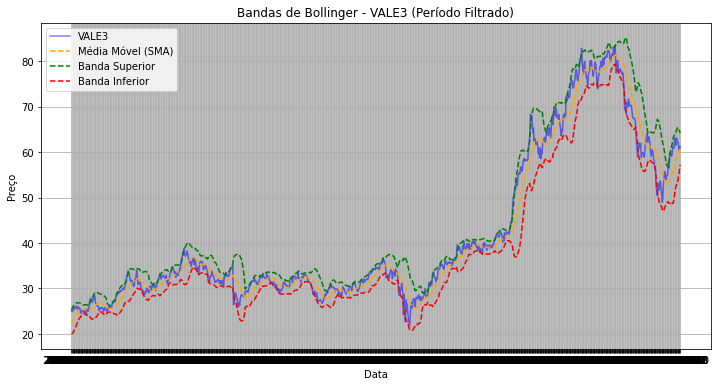

In [22]:

# Certifique-se de que a coluna de data está no formato correto
stock_data['Date']
stock_data.set_index('Date', inplace=True)

# Escolha a ação para análise
acao = 'VALE3'

# Calcular as Bandas de Bollinger
window = 20  # Período para a média móvel
stock_data['SMA'] = stock_data[acao].rolling(window=window).mean()
stock_data['Banda Superior'] = stock_data['SMA'] + (2 * stock_data[acao].rolling(window=window).std())
stock_data['Banda Inferior'] = stock_data['SMA'] - (2 * stock_data[acao].rolling(window=window).std())

# Filtrar para um intervalo de datas (exemplo: últimos 5 anos)
start_date = '2018-01-01'
end_date = '2022-01-01'
filtered_df = stock_data.loc[start_date:end_date]

# Plotar  os dados filtrados
plt.figure(figsize=(12, 6))
plt.plot(filtered_df.index, filtered_df[acao], label=acao, color='blue', alpha=0.5)
plt.plot(filtered_df.index, filtered_df['SMA'], label='Média Móvel (SMA)', color='orange', linestyle='--')
plt.plot(filtered_df.index, filtered_df['Banda Superior'], label='Banda Superior', color='green', linestyle='--')
plt.plot(filtered_df.index, filtered_df['Banda Inferior'], label='Banda Inferior', color='red', linestyle='--')
plt.fill_between(filtered_df.index, filtered_df['Banda Superior'], filtered_df['Banda Inferior'], color='gray', alpha=0.2)
plt.title(f'Bandas de Bollinger - {acao} (Período Filtrado)')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.grid()
plt.show()

3.  **Retornos percentuais diários**

Calcula a variação percentual entre o preço atual e o preço do dia anterior.

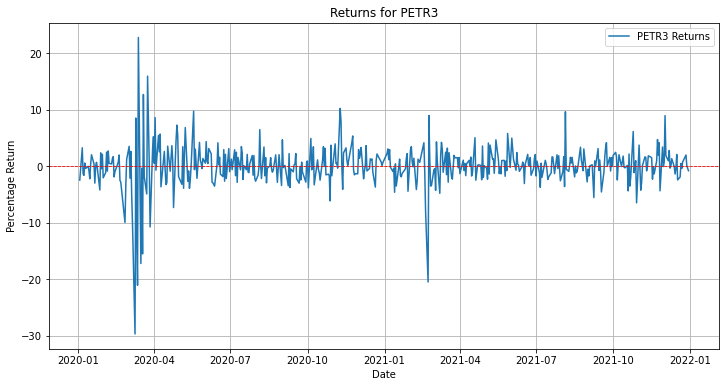

In [15]:
def plot_returns(data, stock, start_date=None, end_date=None):
    # Filtra os dados pelo intervalo de datas
    data['Date'] = pd.to_datetime(data['Date'])
    filtered_data = data.copy()
    if start_date and end_date:
        filtered_data = filtered_data[(filtered_data['Date'] >= start_date) & 
                                      (filtered_data['Date'] <= end_date)]
    
    # Calcula os retornos percentuais
    filtered_data['Returns'] = filtered_data[stock].pct_change() * 100
    
    # Gera o gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_data['Date'], filtered_data['Returns'], label=f'{stock} Returns')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
    plt.xlabel('Date')
    plt.ylabel('Percentage Return')
    plt.title(f'Returns for {stock}')
    plt.legend()
    plt.grid()
    plt.show()

# Exemplo
plot_returns(stock_data, 'PETR3', start_date='2020-01-01', end_date='2022-01-01')
